<a href="https://colab.research.google.com/github/vicentemf/predictive-models/blob/main/titanic_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Este código tem como objetivo prever os possíveis sobreviventes do acidente do navio TITANIC .



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
train=pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
gender_submission = pd.read_csv('/content/gender_submission.csv')

In [3]:
titanic_df= train.append(test,ignore_index=True)

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [5]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df = pd.DataFrame()
passengerId = test['PassengerId']

SURVIVED

Quantidade de valores únicos: 2
Quais são os valores únicos: [ 0.  1. nan]
Quantidade de valores nulos: 418
Quantidade por opção: 
0.0    549
1.0    342
Name: Survived, dtype: int64


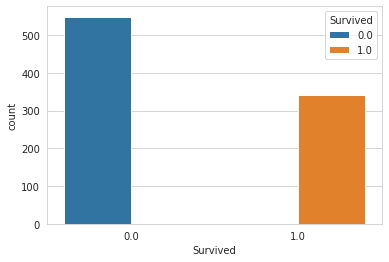

In [7]:
def titanic_func(data, column, count = True):
    print(f'Quantidade de valores únicos: {data[column].nunique()}')
    print(f'Quais são os valores únicos: {data[column].unique()}')
    print(f'Quantidade de valores nulos: {data[column].isnull().sum()}')
    print(f'Quantidade por opção: \n{data[column].value_counts()}')
    
    if count == True:
        sns.countplot(data = data, x = column, hue = 'Survived')
    else:
        sns.displot(data[column], kde = True)

def survived_table(column):
    return titanic_df[[column, "Survived"]].groupby([column], as_index=False).mean().sort_values(by='Survived')







titanic_func(titanic_df, 'Survived')

In [8]:
df['Survived'] = titanic_df['Survived']

OBSERVAÇÕES : 
 PELOS DADOS FORNECIDOS, A MAIOR PARTE DOS PASSAGEIROS NÃO SOBREVIVE 

PCLASS

Quantidade de valores únicos: 3
Quais são os valores únicos: [3 1 2]
Quantidade de valores nulos: 0
Quantidade por opção: 
3    709
1    323
2    277
Name: Pclass, dtype: int64


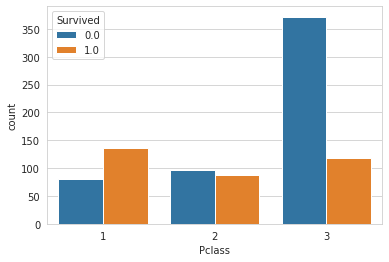

In [9]:
titanic_func(titanic_df, 'Pclass')

In [10]:
survived_table('Pclass')

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


Observações :
 
 1- 62% dos passageiros da primeira classe sobrevivem contra 47 % da segunda classe e 24 % da terceira classe



In [11]:
df['Pclass'] = titanic_df['Pclass']

SEX

Quantidade de valores únicos: 2
Quais são os valores únicos: ['male' 'female']
Quantidade de valores nulos: 0
Quantidade por opção: 
male      843
female    466
Name: Sex, dtype: int64


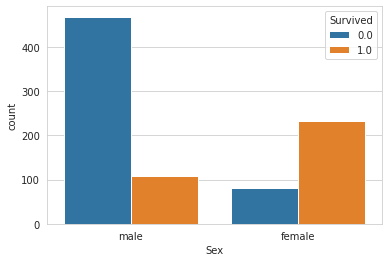

In [12]:
titanic_func(titanic_df, 'Sex')

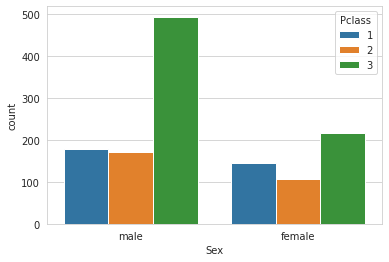

In [13]:
sns.countplot(x=titanic_df['Sex'],hue=titanic_df['Pclass'])

In [14]:
survived_table('Sex')

,Sex,Survived
1,male,0.188908
0,female,0.742038


Obervações :

1-74 % das mulheres sobreviveram .

2- 19% dos homens sobreviveram .

3-A diferença do número de homens e mulheres na terceira classe é significamente maior do que na primeira e segunda classe .

In [15]:
df['Sex'] = titanic_df['Sex']
df.head()

,Survived,Pclass,Sex
0,0.0,3,male
1,1.0,1,female
2,1.0,3,female
3,1.0,1,female
4,0.0,3,male


In [16]:
df['Sex'] =df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)   


AGE

Quantidade de valores únicos: 98
Quais são os valores únicos: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]
Quantidade de valores nulos: 263
Quantidade por opção: 
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64


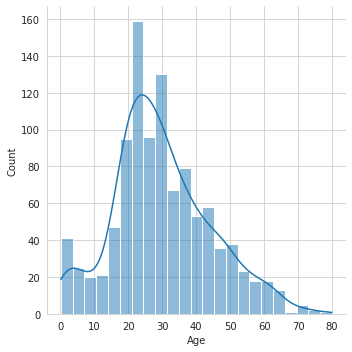

In [17]:
titanic_func(titanic_df, 'Age', False)

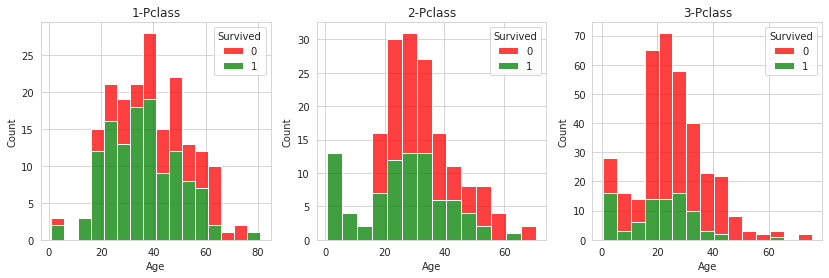

In [18]:
figure, ax = plt.subplots(1, 3, figsize=(14,4))
sns.histplot(data =train[train['Pclass']==1] , x = 'Age' , hue = "Survived",binwidth=5,ax = ax[0],palette = sns.color_palette(['red' ,'green']),multiple = 'stack').set_title('1-Pclass')
sns.histplot(data = train[train['Pclass']==2] , x = 'Age' , hue = "Survived",binwidth=5,ax = ax[1],palette = sns.color_palette(['red' ,'green']),multiple = 'stack').set_title('2-Pclass')
sns.histplot(data = train[train['Pclass']==3] , x = 'Age' , hue = "Survived",binwidth=5,ax = ax[2],palette = sns.color_palette(['red','green']),multiple = 'stack').set_title('3-Pclass')
plt.show()

1 -Na primeira classe,crianças e adultos em sua grande maioria sobreviveram

2- Na segunda classe,percebe-se uma prioridade na sobrevivência das crianças

3-Na terceira classe não é possível perceber alguma prioridade por idade 



Text(0.5, 1.0, 'Females')

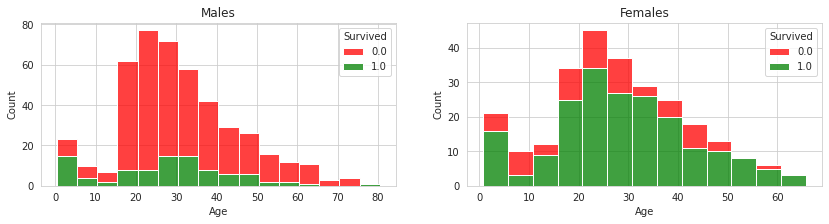

In [19]:
plot , ax = plt.subplots(1 , 2 , figsize=(14,3))
sns.histplot(data = titanic_df.loc[titanic_df["Sex"]=="male"] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[0],palette = sns.color_palette(["red" , "green"]),multiple = "stack").set_title("Males")
sns.histplot(data = titanic_df.loc[titanic_df["Sex"]=="female"] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[1],palette = sns.color_palette(["red" , "green"]),multiple = "stack").set_title("Females")

OBERVAÇÕES :
 1- Mulheres tem prioridade em todas as idades 

 2- Os passageiros com mais de  70 anos são todos homens 

 3- Reforço da idéia de que crianças tem prioridade já que os homens na idade de 0 a 10 anos tem mais chance de sobrevivência que os homens de outras idades .

In [20]:
for i in sorted(titanic_df['Pclass'].unique()):
    print(f"Pessoas da {i}ª classe tem a média de idade de: {titanic_df[titanic_df['Pclass'] == i]['Age'].mean():.0f} anos.")

Pessoas da 1ª classe tem a média de idade de: 39 anos.
Pessoas da 2ª classe tem a média de idade de: 30 anos.
Pessoas da 3ª classe tem a média de idade de: 25 anos.


In [21]:
for i in titanic_df.index:
    
    if pd.isnull(titanic_df['Age'][i]):
        
        if titanic_df['Pclass'][i] == 1:
            titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 1]['Age'].mean(), 0)
            
        elif titanic_df['Pclass'][i] == 2:
            titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 2]['Age'].mean(), 0)
            
        elif titanic_df['Pclass'][i] == 3:
            titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean(), 0)
            
    else:
        continue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


OBSERVAÇÕES:
1-Todos os passageiros com 70 anos ou mais são homens

In [22]:
titanic_df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [23]:
titanic_df['AgeBand'] = pd.cut(titanic_df['Age'], 5)
titanic_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.0902, 16.136]",0.550000
1,"(16.136, 32.102]",0.336714
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [24]:
titanic_df['Age']=titanic_df['Age'].astype(int)

In [25]:
titanic_df.loc[ titanic_df['Age'] <= 16, 'Age'] = 0
titanic_df.loc[(titanic_df['Age'] > 16) & (titanic_df['Age'] <= 32), 'Age'] = 1
titanic_df.loc[(titanic_df['Age'] > 32) & (titanic_df['Age'] <= 48), 'Age'] = 2
titanic_df.loc[(titanic_df['Age'] > 48) & (titanic_df['Age'] <= 64), 'Age'] = 3
titanic_df.loc[(titanic_df['Age'] > 64)  & (titanic_df['Age'] <= 81), 'Age'] = 4

titanic_df['Age'].unique()

array([1, 2, 3, 0, 4])

In [26]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S,"(16.136, 32.102]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C85,C,"(32.102, 48.068]"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.136, 32.102]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,C123,S,"(32.102, 48.068]"
4,5,0.0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,NaN,S,"(32.102, 48.068]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,1,0,0,A.5. 3236,8.0500,NaN,S,"(16.136, 32.102]"
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,2,0,0,PC 17758,108.9000,C105,C,"(32.102, 48.068]"
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,2,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,"(32.102, 48.068]"
1307,1308,NaN,3,"Ware, Mr. Frederick",male,1,0,0,359309,8.0500,NaN,S,"(16.136, 32.102]"


In [27]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S,"(16.136, 32.102]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C85,C,"(32.102, 48.068]"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.136, 32.102]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,C123,S,"(32.102, 48.068]"
4,5,0.0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,NaN,S,"(32.102, 48.068]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,1,0,0,A.5. 3236,8.0500,NaN,S,"(16.136, 32.102]"
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,2,0,0,PC 17758,108.9000,C105,C,"(32.102, 48.068]"
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,2,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,"(32.102, 48.068]"
1307,1308,NaN,3,"Ware, Mr. Frederick",male,1,0,0,359309,8.0500,NaN,S,"(16.136, 32.102]"


In [28]:
titanic_df['Age'].isnull().sum()

0

In [29]:
df['Age'] = titanic_df['Age']
df.head()

,Survived,Pclass,Sex,Age
0,0.0,3,0,1
1,1.0,1,1,2
2,1.0,3,1,1
3,1.0,1,1,2
4,0.0,3,0,2


SIBSP/PARCH

Quantidade de valores únicos: 7
Quais são os valores únicos: [1 0 3 4 2 5 8]
Quantidade de valores nulos: 0
Quantidade por opção: 
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


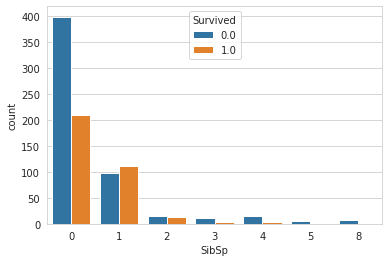

In [30]:
titanic_func(titanic_df, 'SibSp')

Quantidade de valores únicos: 8
Quais são os valores únicos: [0 1 2 5 3 4 6 9]
Quantidade de valores nulos: 0
Quantidade por opção: 
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64


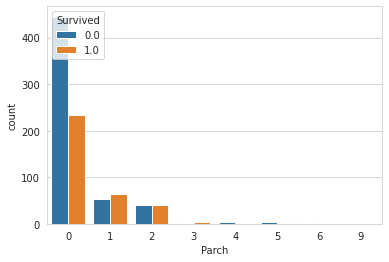

In [31]:
titanic_func(titanic_df, 'Parch')

In [32]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

Quantidade de valores únicos: 9
Quais são os valores únicos: [ 2  1  5  3  7  6  4  8 11]
Quantidade de valores nulos: 0
Quantidade por opção: 
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64


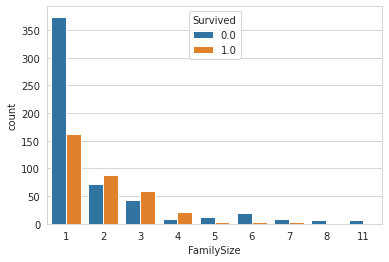

In [33]:
titanic_func(titanic_df, 'FamilySize')

In [34]:
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1


In [35]:
titanic_df['IsAlone'].unique()

array([0, 1])

In [36]:
titanic_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


OBSERVAÇÕES :
 1- A maioria das pessoas estavam viajando sozinhas

 2- Componentes de grupos de 2 ,3 e 4 pessoas tem mais chance de sobrevivência que os demais .

In [37]:
titanic_df['Single'] = titanic_df['FamilySize'].map(lambda s: 1 if s == 1 else 0)
titanic_df['SmallF'] = titanic_df['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
titanic_df['MedF'] = titanic_df['FamilySize'].map(lambda s: 1 if 3 <=s <= 4  else 0)
titanic_df['LargeF'] = titanic_df['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

In [38]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,FamilySize,IsAlone,Single,SmallF,MedF,LargeF
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S,"(16.136, 32.102]",2,0,0,1,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C85,C,"(32.102, 48.068]",2,0,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.136, 32.102]",1,1,1,0,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,C123,S,"(32.102, 48.068]",2,0,0,1,0,0
4,5,0.0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,NaN,S,"(32.102, 48.068]",1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,1,0,0,A.5. 3236,8.0500,NaN,S,"(16.136, 32.102]",1,1,1,0,0,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,2,0,0,PC 17758,108.9000,C105,C,"(32.102, 48.068]",1,1,1,0,0,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,2,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,"(32.102, 48.068]",1,1,1,0,0,0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,1,0,0,359309,8.0500,NaN,S,"(16.136, 32.102]",1,1,1,0,0,0


In [39]:
df['Single'] = titanic_df['Single']
df['SmallF'] = titanic_df['SmallF'] 
df['MedF'] = titanic_df['MedF']
df['LargeF'] = titanic_df['LargeF']
df.head()

,Survived,Pclass,Sex,Age,Single,SmallF,MedF,LargeF
0,0.0,3,0,1,0,1,0,0
1,1.0,1,1,2,0,1,0,0
2,1.0,3,1,1,1,0,0,0
3,1.0,1,1,2,0,1,0,0
4,0.0,3,0,2,1,0,0,0


FARE

Quantidade de valores únicos: 281
Quais são os valores únicos: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      15

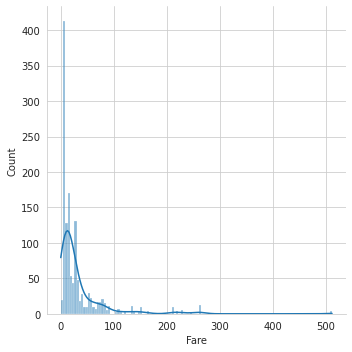

In [40]:
titanic_func(titanic_df, 'Fare', False)

In [41]:
titanic_df[titanic_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,FamilySize,IsAlone,Single,SmallF,MedF,LargeF
1043,1044,NaN,3,"Storey, Mr. Thomas",male,3,0,0,3701,NaN,NaN,S,"(48.068, 64.034]",1,1,1,0,0,0


In [42]:
titanic_df['Fare'].fillna(titanic_df[titanic_df['Pclass'] == 3]['Fare'].mean(), inplace = True)

In [43]:
titanic_df['FareBand'] = pd.qcut(titanic_df['Fare'], 4)
titanic_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=False)

,FareBand,Survived
3,"(31.275, 512.329]",0.600000
2,"(14.454, 31.275]",0.441048
1,"(7.896, 14.454]",0.303571
0,"(-0.001, 7.896]",0.197309


In [44]:
titanic_df['Fare'] = titanic_df['Fare'].astype(int)

In [45]:
titanic_df.loc[ titanic_df['Fare'] <= 7.89, 'Fare'] = 0
titanic_df.loc[(titanic_df['Fare'] > 7.89) & (titanic_df['Fare'] <= 14.454), 'Fare'] = 1
titanic_df.loc[(titanic_df['Fare'] > 14.454) & (titanic_df['Fare'] <= 31.275), 'Fare']   = 2
titanic_df.loc[ titanic_df['Fare'] > 31.275, 'Fare'] = 3

titanic_df['Fare'].unique()

array([0, 3, 1, 2])

In [46]:
df['Fare'] = titanic_df['Fare']
df.head()

,Survived,Pclass,Sex,Age,Single,SmallF,MedF,LargeF,Fare
0,0.0,3,0,1,0,1,0,0,0
1,1.0,1,1,2,0,1,0,0,3
2,1.0,3,1,1,1,0,0,0,0
3,1.0,1,1,2,0,1,0,0,3
4,0.0,3,0,2,1,0,0,0,1


Quantidade de valores únicos: 3
Quais são os valores únicos: ['S' 'C' 'Q' nan]
Quantidade de valores nulos: 2
Quantidade por opção: 
S    914
C    270
Q    123
Name: Embarked, dtype: int64


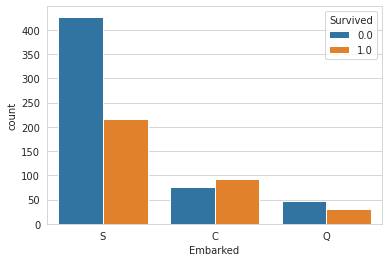

In [47]:
titanic_func(titanic_df, 'Embarked')

In [48]:
survived_table('Embarked')

,Embarked,Survived
2,S,0.336957
1,Q,0.389610
0,C,0.553571


OBSERVAÇÕES :     

 1- O porto 'C' teve 55% de sobreviventes contra 38 % no porto 'Q' e 33% no porto 'S' .

In [49]:
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,FamilySize,IsAlone,Single,SmallF,MedF,LargeF,FareBand
61,62,1.0,1,"Icard, Miss. Amelie",female,2,0,0,113572,3,B28,NaN,"(32.102, 48.068]",1,1,1,0,0,0,"(31.275, 512.329]"
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,3,0,0,113572,3,B28,NaN,"(48.068, 64.034]",1,1,1,0,0,0,"(31.275, 512.329]"


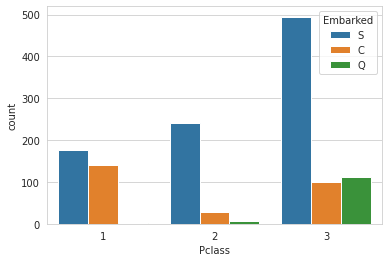

In [50]:
sns.countplot(data = titanic_df, x = titanic_df['Pclass'], hue = 'Embarked')

OBSERVAÇÕES :     
  1- O PORTO S RECEBEU PASSAGEIROS DAS 3 CLASSES 

  2- A PRIMEIRA CLASSE EMBARCOU NOS PORTOS 'S' E 'C'

  

In [51]:
titanic_df['Embarked'].fillna('C', inplace = True)

In [52]:
titanic_df['Embarked'] = titanic_df['Embarked'].replace('S',1)
titanic_df['Embarked']= titanic_df['Embarked'].replace('C',2)
titanic_df['Embarked'] = titanic_df['Embarked'].replace('Q',3)

In [53]:
df['Embarked'] = titanic_df['Embarked']
df.head()

,Survived,Pclass,Sex,Age,Single,SmallF,MedF,LargeF,Fare,Embarked
0,0.0,3,0,1,0,1,0,0,0,1
1,1.0,1,1,2,0,1,0,0,3,2
2,1.0,3,1,1,1,0,0,0,0,1
3,1.0,1,1,2,0,1,0,0,3,1
4,0.0,3,0,2,1,0,0,0,1,1


In [54]:
titanic_df['Title'] = titanic_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [55]:
titanic_df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [56]:
titanic_df['Title'] = titanic_df['Title'].replace(['Mme','Mrs','Ms','Mlle','Miss','the Countess','Lady','Dona','Sir','Don','Jonkheer'],'prioridade')
titanic_df['Title'] = titanic_df['Title'].replace(['Mr','Master','Rev','Dr','Col','Major','Capt'],'não_prioritario')


In [57]:
title_mapping = {'prioridade':1,'não_prioritario':0}
titanic_df['Title'] = titanic_df['Title'].map(title_mapping)


In [58]:
titanic_df['Title'].unique()

array([0, 1])

In [59]:
df['Title'] = titanic_df['Title']
df.head()

,Survived,Pclass,Sex,Age,Single,SmallF,MedF,LargeF,Fare,Embarked,Title
0,0.0,3,0,1,0,1,0,0,0,1,0
1,1.0,1,1,2,0,1,0,0,3,2,1
2,1.0,3,1,1,1,0,0,0,0,1,1
3,1.0,1,1,2,0,1,0,0,3,1,1
4,0.0,3,0,2,1,0,0,0,1,1,0


In [60]:
df.drop(columns=['Single','SmallF','MedF','LargeF','Fare','Embarked'],inplace=True)

In [61]:
train= df[:891]
train

,Survived,Pclass,Sex,Age,Title
0,0.0,3,0,1,0
1,1.0,1,1,2,1
2,1.0,3,1,1,1
3,1.0,1,1,2,1
4,0.0,3,0,2,0
...,...,...,...,...,...
886,0.0,2,0,1,0
887,1.0,1,1,1,1
888,0.0,3,1,1,1
889,1.0,1,0,1,0


In [62]:
test=df[891:]
test

,Survived,Pclass,Sex,Age,Title
891,NaN,3,0,2,0
892,NaN,3,1,2,1
893,NaN,2,0,3,0
894,NaN,3,0,1,0
895,NaN,3,1,1,1
...,...,...,...,...,...
1304,NaN,3,0,1,0
1305,NaN,1,1,2,1
1306,NaN,3,0,2,0
1307,NaN,3,0,1,0


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   Title     891 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


In [64]:
train['Survived'] = train['Survived'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
X = train.drop('Survived', axis = 1)
y = train['Survived']
X_test = test.drop('Survived', axis = 1)

In [66]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [67]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [69]:
# Função que processa o Algoritmo e retorna a acurácia

def func_acuracia(algoritmo, X_train, y_train, vc):
    modelo = algoritmo.fit(X_train, y_train)
    acuracia = round(modelo.score(X_train, y_train) * 100, 2)
    
    train_pred = model_selection.cross_val_predict(algoritmo, X_train, y_train, cv = vc, n_jobs = -1)    
    acuracia_vc = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return acuracia, acuracia_vc

Random Forest


In [70]:
acc_rf, acc_vc_rf = func_acuracia(RandomForestClassifier(), X, y, 10)

print(f"Acurácia: {acc_rf}")
print(f"Acurácia Validação Cruzada: {acc_vc_rf}")

Acurácia: 80.81
Acurácia Validação Cruzada: 79.01


Logistic regression

In [71]:
acc_log, acc_vc_log = func_acuracia(LogisticRegression(max_iter=1000), X, y, 10)

print(f"Acurácia: {acc_log}")
print(f"Acurácia Validação Cruzada: {acc_vc_log}")

Acurácia: 79.24
Acurácia Validação Cruzada: 79.24


K-Nearest Neighbours

In [72]:
acc_knn, acc_vc_knn = func_acuracia(KNeighborsClassifier(), X, y, 10)

print(f"Acurácia: {acc_knn}")
print(f"Acurácia Validação Cruzada: {acc_vc_knn}")

Acurácia: 80.47
Acurácia Validação Cruzada: 78.9


Gaussian Naive Bayes

In [73]:
acc_gaussian, acc_vc_gaussian = func_acuracia(GaussianNB(), X, y, 10)

print(f"Acurácia: {acc_gaussian}")
print(f"Acurácia Validação Cruzada: {acc_vc_gaussian}")

Acurácia: 78.56
Acurácia Validação Cruzada: 78.56


Linear Support Vector Machines (SVC)

In [74]:
acc_linear_svc, acc_vc_linear_svc = func_acuracia(LinearSVC(dual=False), X, y, 10)

print(f"Acurácia: {acc_linear_svc}")
print(f"Acurácia Validação Cruzada: {acc_vc_linear_svc}")

Acurácia: 78.9
Acurácia Validação Cruzada: 78.34


Stochastic Gradient Descent

In [75]:
acc_sgd, acc_vc_sgd = func_acuracia(SGDClassifier(), X, y, 10)

print(f"Acurácia: {acc_sgd}")
print(f"Acurácia Validação Cruzada: {acc_vc_sgd}")

Acurácia: 79.01
Acurácia Validação Cruzada: 75.98


Decision Tree Classifier

In [76]:
acc_dt, acc_vc_dt = func_acuracia(DecisionTreeClassifier(), X, y, 10)

print(f"Acurácia: {acc_dt}")
print(f"Acurácia Validação Cruzada: {acc_vc_dt}")

Acurácia: 80.81
Acurácia Validação Cruzada: 79.01


Gradient Boost Trees

In [77]:
acc_gbt, acc_vc_gbt = func_acuracia(GradientBoostingClassifier(), X, y, 10)

print(f"Acurácia: {acc_gbt}")
print(f"Acurácia Validação Cruzada: {acc_vc_gbt}")

Acurácia: 80.81
Acurácia Validação Cruzada: 79.35


In [78]:

params = dict(     
    max_depth = [n for n in range(1, 5)],     
    min_samples_split = [n for n in range(2, 6)], 
    min_samples_leaf = [n for n in range(2, 6)],     
    n_estimators = [n for n in range(10, 50, 10)],
)

In [79]:
gbc = GradientBoostingClassifier()
gbc_cv = GridSearchCV(estimator = gbc, param_grid = params, cv = 10) 
gbc_cv.fit(X, y)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40]})

In [80]:
print(f"Melhor pontuação: {gbc_cv.best_score_}")
print(f"Melhores parâmetros: {gbc_cv.best_estimator_}")

Melhor pontuação: 0.7946566791510611
Melhores parâmetros: GradientBoostingClassifier(max_depth=4, min_samples_leaf=2, n_estimators=10)


In [81]:
gradientBoostingClassifier_pred = gbc_cv.predict(X_test)

In [82]:
kaggle = pd.DataFrame({'PassengerId': passengerId, 'Survived': gradientBoostingClassifier_pred})

kaggle.to_csv('./titanic_gradient_boosting_pred.csv', index=False)

In [83]:
0.7946566791510611

0.7946566791510611